# EDA - HDB Sample

In [1]:
import numpy as np 
import pandas as pd

# Graphical Component
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Import Data

In [2]:
df_train = pd.read_csv('./datasets/train.csv', low_memory=False, index_col=0)

In [3]:
df_train.shape

(150634, 76)

In [4]:
df_test = pd.read_csv('./datasets/test.csv', low_memory=False, index_col=0)

In [5]:
df_test.shape

(16737, 75)

In [6]:
y_test = pd.read_csv('./datasets/sample_sub_reg.csv', low_memory=False, index_col=0)

In [7]:
y_test

,Predicted
Id,
114982,500000
95653,500000
40303,500000
109506,500000
100149,500000
...,...
23347,500000
54003,500000
128921,500000


## File Exploration

In [8]:
df_train.shape

(150634, 76)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150634 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150634 non-null  object 
 1   town                       150634 non-null  object 
 2   flat_type                  150634 non-null  object 
 3   block                      150634 non-null  object 
 4   street_name                150634 non-null  object 
 5   storey_range               150634 non-null  object 
 6   floor_area_sqm             150634 non-null  float64
 7   flat_model                 150634 non-null  object 
 8   lease_commence_date        150634 non-null  int64  
 9   resale_price               150634 non-null  float64
 10  Tranc_Year                 150634 non-null  int64  
 11  Tranc_Month                150634 non-null  int64  
 12  mid_storey                 150634 non-null  int64  
 13  lower                      150

In [10]:
df_test.shape

(16737, 75)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16737 entries, 114982 to 146210
Data columns (total 75 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tranc_YearMonth            16737 non-null  object 
 1   town                       16737 non-null  object 
 2   flat_type                  16737 non-null  object 
 3   block                      16737 non-null  object 
 4   street_name                16737 non-null  object 
 5   storey_range               16737 non-null  object 
 6   floor_area_sqm             16737 non-null  float64
 7   flat_model                 16737 non-null  object 
 8   lease_commence_date        16737 non-null  int64  
 9   Tranc_Year                 16737 non-null  int64  
 10  Tranc_Month                16737 non-null  int64  
 11  mid_storey                 16737 non-null  int64  
 12  lower                      16737 non-null  int64  
 13  upper                      16737 non-null  in

In [12]:
y_test.head()

,Predicted
Id,
114982,500000
95653,500000
40303,500000
109506,500000
100149,500000


**There are 76 columns in the training set and there are only 75 columns in test set. The resale price is missing in the test set. Imported y_test, but the data cannot be used.Will work on training datasets instead.**

In [13]:
# remove all data variable
del df_test
del y_test

In [14]:
df = df_train
del df_train

## Basic Data Exploration

### Checking for Duplicates

In [15]:
df.duplicated().sum()

np.int64(362)

In [16]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
18401,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0,...,61,0,1.345945,103.753589,163.557069,Bukit View Secondary School,205,0,1.345723,103.752278
18402,2012-03,BUKIT BATOK,3 ROOM,212,BT BATOK ST 21,06 TO 10,67.0,New Generation,1985,341000.0,...,61,0,1.345945,103.753589,163.557069,Bukit View Secondary School,205,0,1.345723,103.752278
9250,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0,...,40,0,1.349195,103.741000,220.313941,Bukit Batok Secondary School,223,0,1.348351,103.740873
9251,2012-04,BUKIT BATOK,3 ROOM,167,BT BATOK WEST AVE 8,01 TO 05,74.0,Model A,1984,333000.0,...,40,0,1.349195,103.741000,220.313941,Bukit Batok Secondary School,223,0,1.348351,103.740873
58605,2012-04,JURONG EAST,3 ROOM,303,JURONG EAST ST 32,01 TO 05,67.0,New Generation,1983,330000.0,...,33,0,1.348685,103.732975,701.283204,Bukit Batok Secondary School,223,0,1.348351,103.740873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68352,2021-04,HOUGANG,3 ROOM,473B,UPP SERANGOON CRES,04 TO 06,68.0,Model A,2017,360000.0,...,76,1,1.373174,103.897659,101.209122,Serangoon Secondary School,188,0,1.375555,103.901910
67780,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,500000.0,...,110,0,1.406871,103.898911,853.411164,Edgefield Secondary School,226,0,1.400179,103.902141
67779,2021-04,PUNGGOL,4 ROOM,308A,PUNGGOL WALK,01 TO 03,92.0,Premium Apartment,2016,500000.0,...,110,0,1.406871,103.898911,853.411164,Edgefield Secondary School,226,0,1.400179,103.902141


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

### Checking for Null Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150272 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150272 non-null  object 
 1   town                       150272 non-null  object 
 2   flat_type                  150272 non-null  object 
 3   block                      150272 non-null  object 
 4   street_name                150272 non-null  object 
 5   storey_range               150272 non-null  object 
 6   floor_area_sqm             150272 non-null  float64
 7   flat_model                 150272 non-null  object 
 8   lease_commence_date        150272 non-null  int64  
 9   resale_price               150272 non-null  float64
 10  Tranc_Year                 150272 non-null  int64  
 11  Tranc_Month                150272 non-null  int64  
 12  mid_storey                 150272 non-null  int64  
 13  lower                      150

In [20]:
null_column = df.columns[df.isnull().any()].tolist()
null_column

['Mall_Nearest_Distance',
 'Mall_Within_500m',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Hawker_Within_500m',
 'Hawker_Within_1km',
 'Hawker_Within_2km']

In [21]:
df[null_column].isnull().sum()


Mall_Nearest_Distance      824
Mall_Within_500m         92564
Mall_Within_1km          25378
Mall_Within_2km           1933
Hawker_Within_500m       97151
Hawker_Within_1km        60715
Hawker_Within_2km        29124
dtype: int64

### Descriptive Statistics

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,150272.0,97.208086,24.411030,31.000000,75.000000,95.000000,112.000000,2.800000e+02
lease_commence_date,150272.0,1992.443622,12.134476,1966.000000,1984.000000,1992.000000,2001.000000,2.019000e+03
resale_price,150272.0,449190.633689,143396.435327,150000.000000,347000.000000,420000.000000,520000.000000,1.258000e+06
Tranc_Year,150272.0,2016.490763,2.753418,2012.000000,2014.000000,2017.000000,2019.000000,2.021000e+03
Tranc_Month,150272.0,6.581785,3.346493,1.000000,4.000000,7.000000,9.000000,1.200000e+01
mid_storey,150272.0,8.283353,5.507868,2.000000,5.000000,8.000000,11.000000,5.000000e+01
lower,150272.0,7.246846,5.514934,1.000000,4.000000,7.000000,10.000000,4.900000e+01
upper,150272.0,9.319860,5.507183,3.000000,6.000000,9.000000,12.000000,5.100000e+01
mid,150272.0,8.283353,5.507868,2.000000,5.000000,8.000000,11.000000,5.000000e+01
floor_area_sqft,150272.0,1046.347838,262.760325,333.684000,807.300000,1022.580000,1205.568000,3.013920e+03


There is no negative figures.

### Univariate Analysis

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150272 entries, 88471 to 185947
Data columns (total 76 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Tranc_YearMonth            150272 non-null  object 
 1   town                       150272 non-null  object 
 2   flat_type                  150272 non-null  object 
 3   block                      150272 non-null  object 
 4   street_name                150272 non-null  object 
 5   storey_range               150272 non-null  object 
 6   floor_area_sqm             150272 non-null  float64
 7   flat_model                 150272 non-null  object 
 8   lease_commence_date        150272 non-null  int64  
 9   resale_price               150272 non-null  float64
 10  Tranc_Year                 150272 non-null  int64  
 11  Tranc_Month                150272 non-null  int64  
 12  mid_storey                 150272 non-null  int64  
 13  lower                      150

#### Cyclical Analysis

In [24]:
df['Tranc_YearMonth'].unique()

array(['2016-05', '2012-07', '2013-07', '2012-04', '2017-12', '2013-01',
       '2018-05', '2012-03', '2020-01', '2014-06', '2013-06', '2018-03',
       '2017-07', '2015-08', '2019-10', '2018-01', '2020-11', '2015-12',
       '2017-08', '2015-07', '2019-04', '2019-08', '2020-06', '2020-07',
       '2017-09', '2016-03', '2012-11', '2012-12', '2018-11', '2013-04',
       '2020-12', '2019-03', '2017-04', '2016-12', '2021-04', '2012-10',
       '2014-07', '2018-04', '2017-01', '2015-04', '2012-06', '2013-08',
       '2019-07', '2017-02', '2020-08', '2017-10', '2020-10', '2015-01',
       '2020-02', '2019-01', '2019-09', '2016-06', '2016-08', '2018-12',
       '2018-07', '2015-03', '2012-05', '2014-04', '2014-09', '2014-12',
       '2015-09', '2017-11', '2020-03', '2015-06', '2012-09', '2014-11',
       '2014-05', '2021-01', '2012-08', '2016-04', '2013-05', '2016-02',
       '2016-01', '2018-02', '2014-10', '2021-02', '2017-06', '2014-03',
       '2018-06', '2019-02', '2020-04', '2021-03', 

In [25]:
df['Tranc_Year'].unique()

array([2016, 2012, 2013, 2017, 2018, 2020, 2014, 2015, 2019, 2021])

In [26]:
df['Tranc_Month'].unique()

array([ 5,  7,  4, 12,  1,  3,  6,  8, 10, 11,  9,  2])

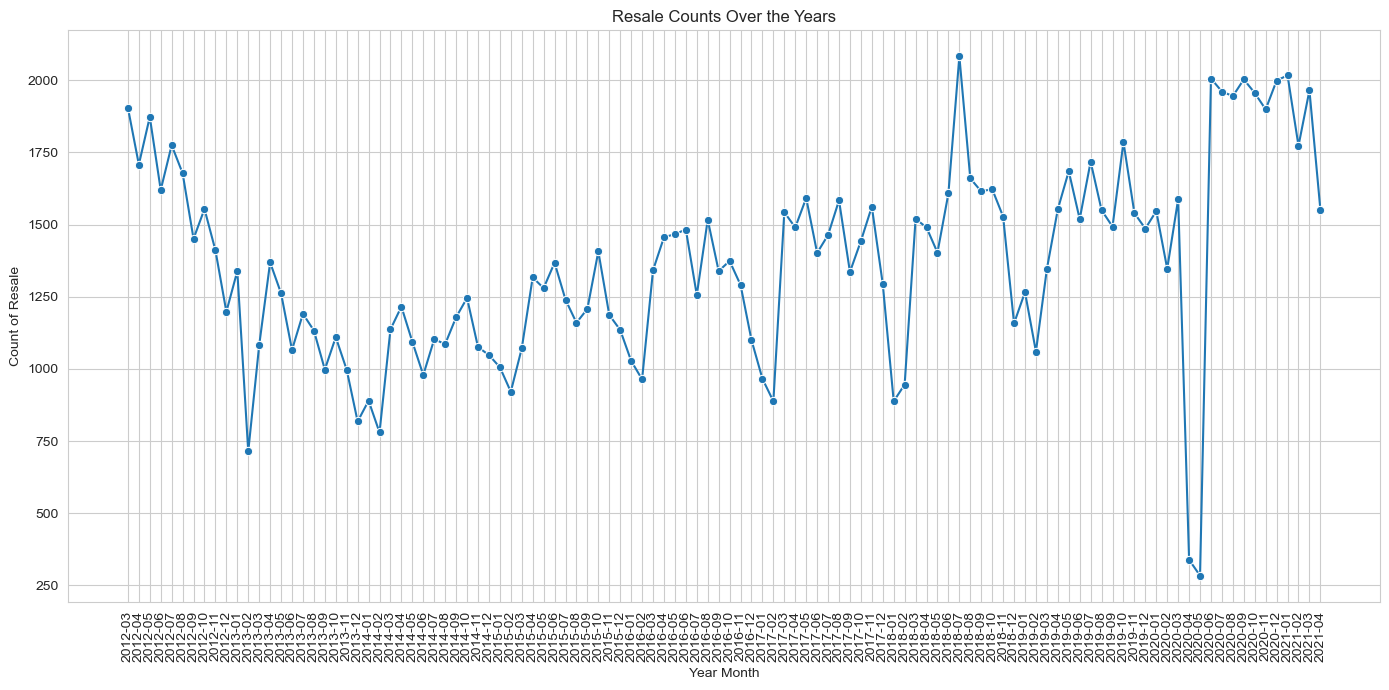

In [27]:
month_counts = df['Tranc_YearMonth'].value_counts().sort_index()
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')
plt.title('Resale Counts Over the Years')
plt.xlabel('Year Month')
plt.ylabel('Count of Resale')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**The charts shows that the number of resale flat is pretty much cyclical. February is the season with the lowest sales closed.**

#### Resale Price Analysis

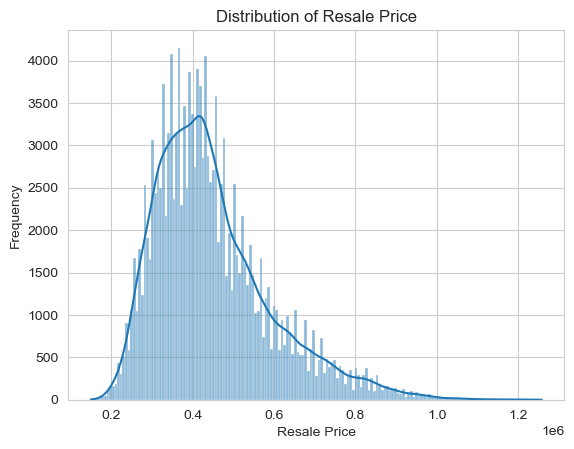

In [28]:
sns.histplot(df['resale_price'], kde=True)
plt.title('Distribution of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

**Average median price is about 420k based on descriptive statistics**

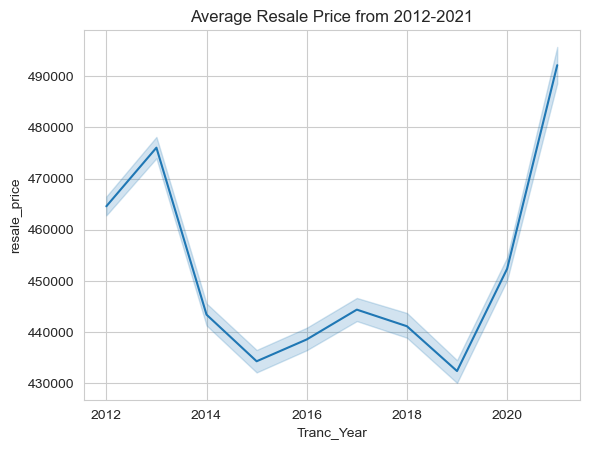

In [29]:
sns.lineplot(data=df, x='Tranc_Year', y='resale_price', estimator='mean')
plt.title('Average Resale Price from 2012-2021')
plt.show()

**Average price can only served as a guide. More important is the current price.**

#### Flat Type Analysis

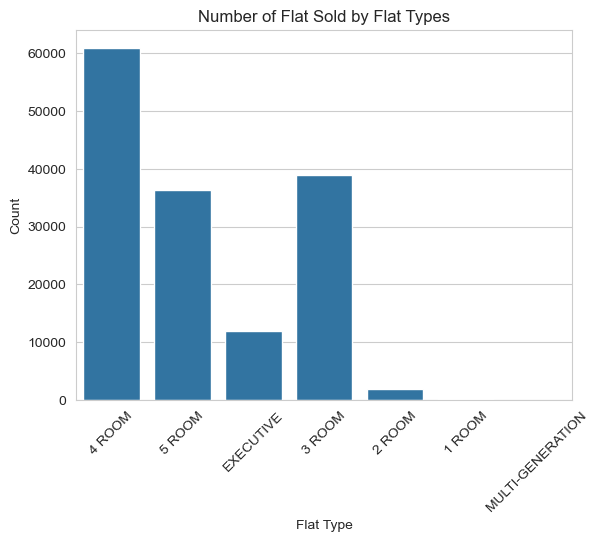

In [30]:
count_plot = sns.countplot(x='flat_type', data=df)
plt.title('Number of Flat Sold by Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**4 room flat is the most popular resale flat type.**

In [31]:
df.flat_type.unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

### Multivariate Analysis

#### Flat Type by Resale Price

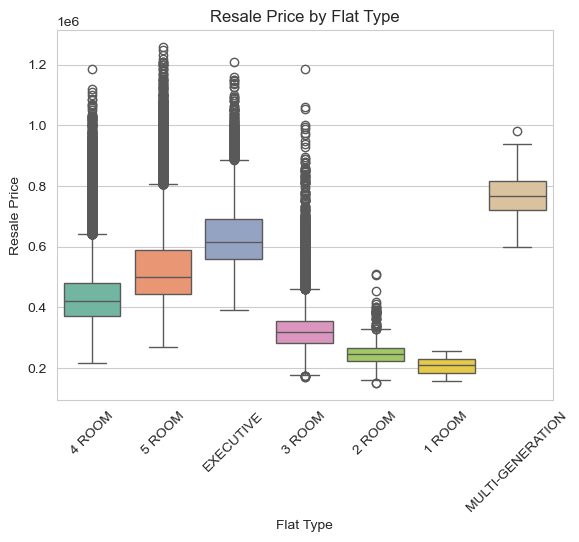

In [32]:
sns.boxplot(x='flat_type', y='resale_price', data=df, hue='flat_type', palette='Set2')
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=45)
plt.show()

**There are many outliers from 2 Room to Executive flat type.**

#### Resale Price by Floor Area and Flat type

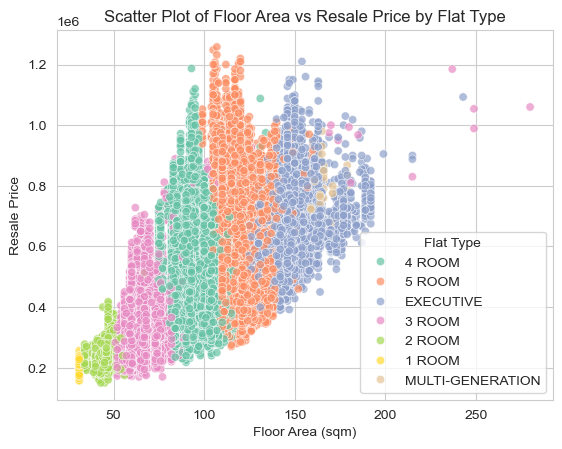

In [33]:
sns.scatterplot(x='floor_area_sqm', y='resale_price', hue='flat_type', data=df, palette='Set2', alpha=0.7)
plt.title('Scatter Plot of Floor Area vs Resale Price by Flat Type')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.legend(title='Flat Type')
plt.show()

**Most plot are inline with respect to the price and floor area. However, there are some 3-Room flat and 4-Room flat has high floor area and also command high price. We need to investigate some 3 room, 4 room flat that is resale at very high price.** 

In [34]:
outliers = df[(df['flat_type'] == '3 ROOM') & 
                        (df['floor_area_sqm'] > 150) & 
                        (df['resale_price'] > 800000)]
outliers

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
28091,2015-03,KALLANG/WHAMPOA,3 ROOM,53,JLN MA'MOR,01 TO 03,280.0,Terrace,1972,1060000.0,...,48,0,1.321689,103.857652,678.037848,Bendemeer Secondary School,188,0,1.324611,103.86097
57606,2012-08,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,988888.0,...,48,0,1.321689,103.857652,520.310251,Bendemeer Secondary School,188,0,1.324611,103.86097
48229,2017-06,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,01 TO 03,215.0,Terrace,1972,830000.0,...,48,0,1.321689,103.857652,559.951624,Bendemeer Secondary School,188,0,1.324611,103.86097
59054,2019-07,KALLANG/WHAMPOA,3 ROOM,42,JLN BAHAGIA,01 TO 03,169.0,Terrace,1972,975000.0,...,48,0,1.321689,103.857652,527.441050,Bendemeer Secondary School,188,0,1.324611,103.86097
63429,2018-09,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,01 TO 03,237.0,Terrace,1972,1185000.0,...,48,0,1.321689,103.857652,557.318067,Bendemeer Secondary School,188,0,1.324611,103.86097
53934,2013-11,KALLANG/WHAMPOA,3 ROOM,59,JLN MA'MOR,01 TO 03,180.0,Terrace,1972,993888.0,...,48,0,1.321689,103.857652,577.917689,Bendemeer Secondary School,188,0,1.324611,103.86097
57605,2017-12,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,01 TO 03,249.0,Terrace,1972,1053888.0,...,48,0,1.321689,103.857652,520.310251,Bendemeer Secondary School,188,0,1.324611,103.86097
13182,2018-05,KALLANG/WHAMPOA,3 ROOM,44,JLN BAHAGIA,01 TO 03,185.0,Terrace,1972,968000.0,...,48,0,1.321689,103.857652,519.218092,Bendemeer Secondary School,188,0,1.324611,103.86097
62889,2018-06,KALLANG/WHAMPOA,3 ROOM,58,JLN MA'MOR,01 TO 03,174.0,Terrace,1972,950000.0,...,48,0,1.321689,103.857652,593.773530,Bendemeer Secondary School,188,0,1.324611,103.86097


## Class Activity

In [35]:
flat_type_model = df[['flat_type', 'flat_model', 'floor_area_sqm', 'resale_price']].groupby(['flat_type', 'flat_model']).mean()
flat_type_model

floor_area_sqm  resale_price
flat_type        flat_model                                          
1 ROOM           Improved                     31.000000  2.070155e+05
2 ROOM           2-room                       50.750000  2.480000e+05
                 DBSS                         50.000000  3.000000e+05
                 Improved                     45.414587  2.433968e+05
                 Model A                      46.383989  2.492683e+05
                 Premium Apartment            51.783784  2.526486e+05
                 Standard                     44.942568  2.423502e+05
3 ROOM           DBSS                         65.755435  5.057995e+05
                 Improved                     65.206836  3.185553e+05
                 Model A                      71.703023  3.463834e+05
                 New Generation               69.851083  3.195350e+05
                 Premium Apartment            67.474699  4.105037e+05
                 Simplified                   64.372141  3.089297e+05
                 Standard                     60.477363  3.088376e+05
                 Terrace                     108.883721  8.108271e+05
4 ROOM           Adjoined flat               116.192308  6.091923e+05
                 DBSS                         89.921797  6.954107e+05
                 Improved                     85.169690  4.466255e+05
                 Model A                      99.134943  4.551402e+05
                 Model A2                     89.216085  3.691446e+05
                 New Generation               93.159049  4.175360e+05
                 Premium Apartment            94.776700  4.576059e+05
                 Premium Apartment Loft       97.944444  8.900216e+05
                 Simplified                   84.495940  3.763219e+05
                 Standard                     77.420000  4.524335e+05
                 Terrace                     114.555556  8.898889e+05
                 Type S1                      94.363636  9.050422e+05
5 ROOM           Adjoined flat               135.420290  6.679009e+05
                 DBSS                        111.895282  8.384621e+05
                 Improved                    117.805799  5.245434e+05
                 Improved-Maisonette         135.789474  6.775731e+05
                 Model A                     134.405573  5.546933e+05
                 Model A-Maisonette          140.938931  6.978675e+05
                 Premium Apartment           113.722564  4.947113e+05
                 Premium Apartment Loft      148.000000  8.483269e+05
                 Standard                    118.905470  6.193263e+05
                 Type S2                     106.125984  1.019220e+06
EXECUTIVE        Adjoined flat               161.705263  7.587183e+05
                 Apartment                   143.736340  6.203696e+05
                 Maisonette                  147.902775  6.744154e+05
                 Premium Apartment           133.201534  5.592046e+05
                 Premium Maisonette          160.466667  7.605333e+05
MULTI-GENERATION Multi Generation            161.250000  7.679920e+05

**From the table we discover that flat model plays a role in different flat type. There are 3 rooms flat that are terrace type. If we calculate average resale price by flat type, the average resale price by be inflated due to the outliers**

In [39]:
try:
    df[['town', 'flat_model', 'floor_area_sqm','resale_price']].groupby('town', 'flat_model').mean()
except Exception as e:
    print(e)

No axis named flat_model for object type DataFrame


In [40]:
town_type_model = df[['town','flat_model', 'floor_area_sqm', 'resale_price']].groupby(['town','flat_model']).mean()
town_type_model

floor_area_sqm   resale_price
town       flat_model                                      
ANG MO KIO Adjoined flat          155.466667  765690.666667
           Apartment              149.575000  806666.600000
           DBSS                   104.347305  785763.281437
           Improved               100.920135  558275.814398
           Maisonette             147.428571  794285.714286
...                                      ...            ...
YISHUN     Model A                 91.342394  361066.878364
           Multi Generation       165.000000  740615.771429
           New Generation          75.504677  321525.034612
           Premium Apartment       87.279412  410263.823529
           Simplified              79.988769  322126.602246

[226 rows x 2 columns]

### Problem Framing

Advice a family looking for a flat:

- 4 room flat
- high floor
- Between 400k to 500k, which is around median (400k)
- No preferred location

In [41]:
four_room = df[df['flat_type'] == '4 ROOM']
four_room

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
90310,2013-06,SENGKANG,4 ROOM,273D,COMPASSVALE LINK,13 TO 15,90.0,Premium Apartment,2009,625000.0,...,79,0,1.382893,103.895854,490.102280,Seng Kang Secondary School,199,0,1.386099,103.898393
52757,2015-08,BUKIT MERAH,4 ROOM,54,HAVELOCK RD,28 TO 30,94.0,Model A,2013,770000.0,...,54,0,1.291299,103.823941,611.944312,Gan Eng Seng School,223,0,1.289071,103.823734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149220,2018-09,BUKIT PANJANG,4 ROOM,633B,SENJA RD,07 TO 09,93.0,Model A,2013,450000.0,...,64,0,1.383591,103.760289,343.787864,West Spring Secondary School,220,0,1.387804,103.760148
94196,2016-09,CLEMENTI,4 ROOM,708,CLEMENTI WEST ST 2,01 TO 03,92.0,New Generation,1980,395000.0,...,69,0,1.312622,103.757030,574.271220,Kent Ridge Secondary School,206,0,1.301353,103.764927
56385,2015-12,PUNGGOL,4 ROOM,603C,PUNGGOL RD,10 TO 12,92.0,Model A,2012,450000.0,...,68,0,1.400298,103.907431,185.251062,Punggol Secondary School,194,0,1.402126,103.909119


In [42]:
four_room[['flat_model', 'floor_area_sqm','resale_price']].groupby('flat_model').mean()

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,116.192308,609192.269231
DBSS,89.921797,695410.685524
Improved,85.169690,446625.505703
Model A,99.134943,455140.191919
Model A2,89.216085,369144.595930
New Generation,93.159049,417535.991731
Premium Apartment,94.776700,457605.880702
Premium Apartment Loft,97.944444,890021.555556
Simplified,84.495940,376321.867989


In [43]:
four_room[['town', 'flat_model', 'floor_area_sqm','resale_price']].groupby(['town','flat_model']).mean()

floor_area_sqm   resale_price
town       flat_model                                      
ANG MO KIO DBSS                    90.434783  713052.579710
           Model A                 94.011111  589822.108333
           New Generation          93.005789  438265.261216
BEDOK      Adjoined flat          106.000000  420000.000000
           DBSS                    86.729730  665918.918919
...                                      ...            ...
YISHUN     DBSS                    92.000000  566078.725275
           Model A                 99.873511  389028.412320
           New Generation          93.464401  379586.372168
           Premium Apartment       94.434783  416816.347826
           Simplified              84.343507  334338.093357

[124 rows x 2 columns]

In [44]:
less_500 = four_room[four_room['resale_price'] <= 500000]

In [45]:
less_500[['flat_model', 'floor_area_sqm','resale_price']].groupby('flat_model').mean()

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,103.166667,450000.000000
DBSS,92.000000,485500.000000
Improved,85.015286,399780.603163
Model A,99.858916,404428.849113
Model A2,89.214390,368672.555177
New Generation,93.055388,403140.615969
Premium Apartment,95.239805,418179.598816
Simplified,84.441170,364385.065434
Standard,75.746552,430675.448276


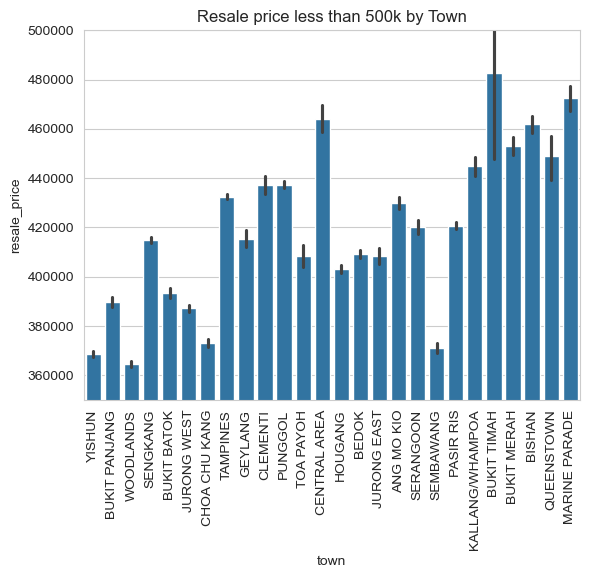

In [46]:
sns.barplot(data=less_500, x='town', y='resale_price')
plt.xticks(rotation=90)
plt.title('Resale price less than 500k by Town')
plt.ylim(350000, 500000)
plt.show()

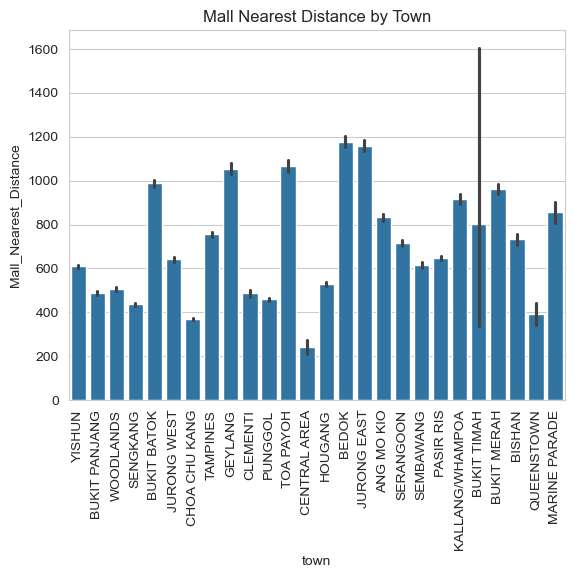

In [47]:
sns.barplot(data=less_500, x='town', y='Mall_Nearest_Distance')
plt.title('Mall Nearest Distance by Town')
plt.xticks(rotation=90)
plt.show()

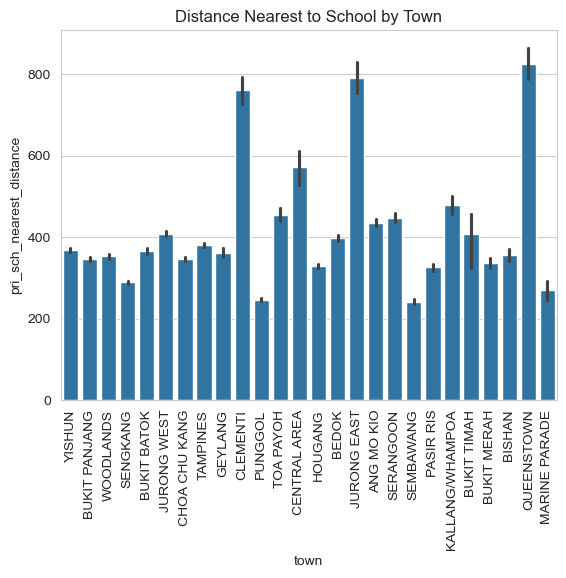

In [48]:
sns.barplot(data=less_500, x='town', y='pri_sch_nearest_distance')
plt.title('Distance Nearest to School by Town')
plt.xticks(rotation=90)
plt.show()

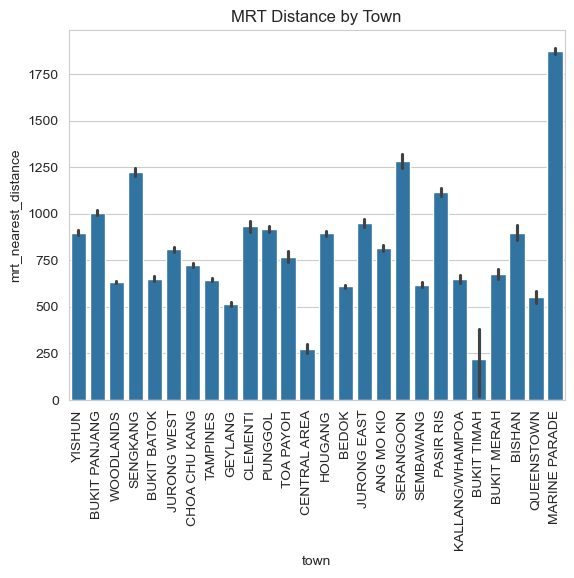

In [49]:
sns.barplot(data=less_500, x='town', y='mrt_nearest_distance')
plt.title('MRT Distance by Town')
plt.xticks(rotation=90)
plt.show()

### Key Takeaway

- **Problem framing is very important.**
- **Sometimes simple solution is the best solution.**
- **There are ready made data that could easy in data extraction.**

#### Thomas Mistake

**Focus too much on taking out outliers.**

In [52]:
four_room = df[df['flat_type'] == '4 ROOM']
four_room

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
90310,2013-06,SENGKANG,4 ROOM,273D,COMPASSVALE LINK,13 TO 15,90.0,Premium Apartment,2009,625000.0,...,79,0,1.382893,103.895854,490.102280,Seng Kang Secondary School,199,0,1.386099,103.898393
52757,2015-08,BUKIT MERAH,4 ROOM,54,HAVELOCK RD,28 TO 30,94.0,Model A,2013,770000.0,...,54,0,1.291299,103.823941,611.944312,Gan Eng Seng School,223,0,1.289071,103.823734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149220,2018-09,BUKIT PANJANG,4 ROOM,633B,SENJA RD,07 TO 09,93.0,Model A,2013,450000.0,...,64,0,1.383591,103.760289,343.787864,West Spring Secondary School,220,0,1.387804,103.760148
94196,2016-09,CLEMENTI,4 ROOM,708,CLEMENTI WEST ST 2,01 TO 03,92.0,New Generation,1980,395000.0,...,69,0,1.312622,103.757030,574.271220,Kent Ridge Secondary School,206,0,1.301353,103.764927
56385,2015-12,PUNGGOL,4 ROOM,603C,PUNGGOL RD,10 TO 12,92.0,Model A,2012,450000.0,...,68,0,1.400298,103.907431,185.251062,Punggol Secondary School,194,0,1.402126,103.909119


In [53]:
four_room[['flat_model', 'floor_area_sqm','resale_price']].groupby('flat_model').mean()

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,116.192308,609192.269231
DBSS,89.921797,695410.685524
Improved,85.169690,446625.505703
Model A,99.134943,455140.191919
Model A2,89.216085,369144.595930
New Generation,93.159049,417535.991731
Premium Apartment,94.776700,457605.880702
Premium Apartment Loft,97.944444,890021.555556
Simplified,84.495940,376321.867989


In [54]:
four_room[['town', 'flat_model', 'floor_area_sqm','resale_price']].groupby(['town','flat_model']).mean()

floor_area_sqm   resale_price
town       flat_model                                      
ANG MO KIO DBSS                    90.434783  713052.579710
           Model A                 94.011111  589822.108333
           New Generation          93.005789  438265.261216
BEDOK      Adjoined flat          106.000000  420000.000000
           DBSS                    86.729730  665918.918919
...                                      ...            ...
YISHUN     DBSS                    92.000000  566078.725275
           Model A                 99.873511  389028.412320
           New Generation          93.464401  379586.372168
           Premium Apartment       94.434783  416816.347826
           Simplified              84.343507  334338.093357

[124 rows x 2 columns]

- Cannot figure out how to expand the data frame.

In [51]:
try:
    less_500 = four_room[four_room['resale_price'] <= 500000 & four_room['floor_area_sqm'] <= 100]
except Exception as e:
    print(e)

Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]


## Improvement After Class Activity

Looking for a flat:

- 4 room flat
- high floor
- Budget : Between 400k to 500k, which is around median (400k)
- No preferred location

In [55]:
four_room = df[df['flat_type'] == '4 ROOM']

In [56]:
four_room[['flat_model', 'floor_area_sqm','resale_price']].groupby('flat_model').mean()

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,116.192308,609192.269231
DBSS,89.921797,695410.685524
Improved,85.169690,446625.505703
Model A,99.134943,455140.191919
Model A2,89.216085,369144.595930
New Generation,93.159049,417535.991731
Premium Apartment,94.776700,457605.880702
Premium Apartment Loft,97.944444,890021.555556
Simplified,84.495940,376321.867989


In [57]:
#sns.boxplot(data=four_room, x='flat_model', y='resale_price')
#plt.title('4 Room Resale by Flat Model')
#plt.xticks(rotation = 90)
#plt.show()

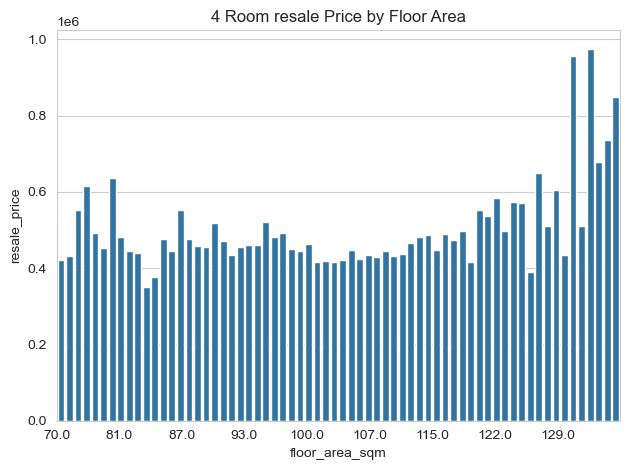

In [58]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
sns.barplot(data=four_room, x='floor_area_sqm', y='resale_price', errorbar=None)
ax.set_title('4 Room resale Price by Floor Area')
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.tight_layout()
plt.show()

In [59]:
four_room_select = four_room[four_room['resale_price'] < 500000]

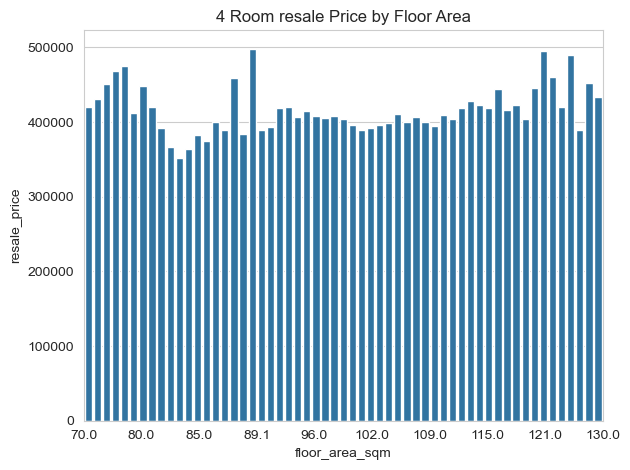

In [60]:
fig, ax = plt.subplots()
sns.barplot(data=four_room_select, x='floor_area_sqm', y='resale_price', errorbar=None)
ax.set_title('4 Room resale Price by Floor Area')
ax.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.tight_layout()
plt.show()

In [61]:
four_room_select[['flat_model', 'floor_area_sqm', 'resale_price']].groupby('flat_model').mean()

,floor_area_sqm,resale_price
flat_model,,
Adjoined flat,103.166667,450000.000000
DBSS,92.000000,478250.000000
Improved,85.021752,397700.723290
Model A,99.857159,403587.510388
Model A2,89.214390,368672.555177
New Generation,93.055864,401821.519300
Premium Apartment,95.258985,415996.913049
Simplified,84.441412,363049.231890
Standard,75.746552,430675.448276


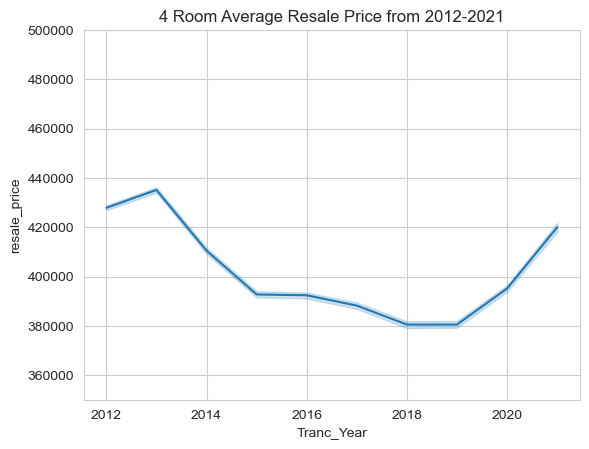

In [63]:
sns.lineplot(data=four_room_select, x='Tranc_Year', y='resale_price', estimator='mean')
plt.title('4 Room Average Resale Price from 2012-2021')
plt.ylim(350000,500000)
#plt.xticks(rotation = 90)
plt.show()

**Should we look at the average price of last 15 years or average price of last 2 years? Customer mush know that historical prices are indicative only**

#### Selection of Flat by Town

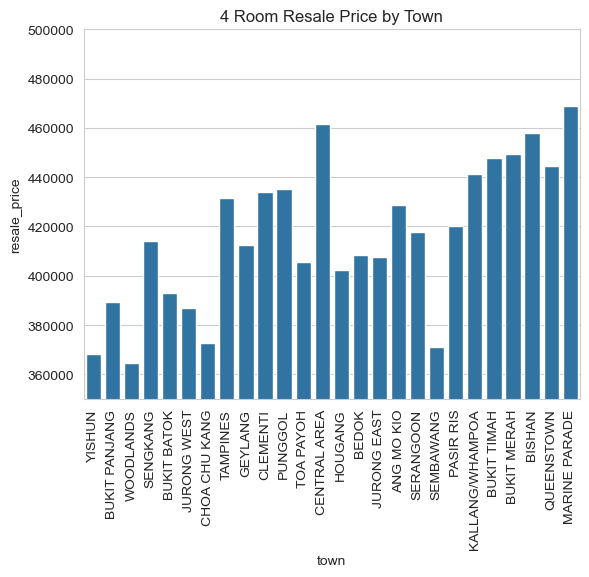

In [64]:
sns.barplot(data=four_room_select, x='town', y='resale_price', estimator='mean', errorbar=None)
plt.title('4 Room Resale Price by Town')
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

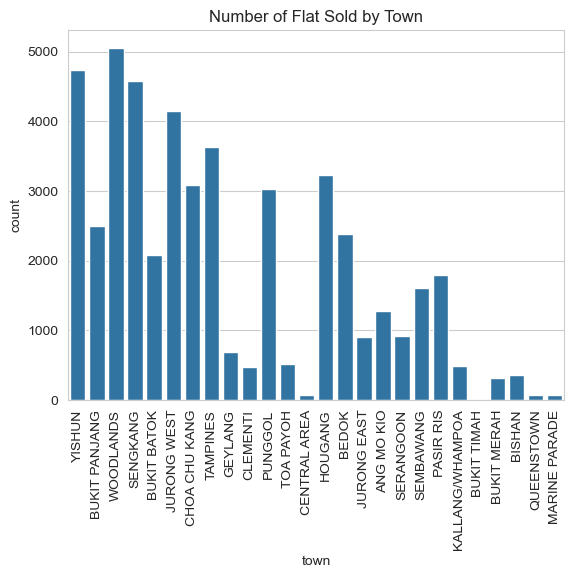

In [65]:
sns.countplot(x='town', data=four_room_select)
plt.title('Number of Flat Sold by Town')
plt.xticks(rotation=90)
plt.show()

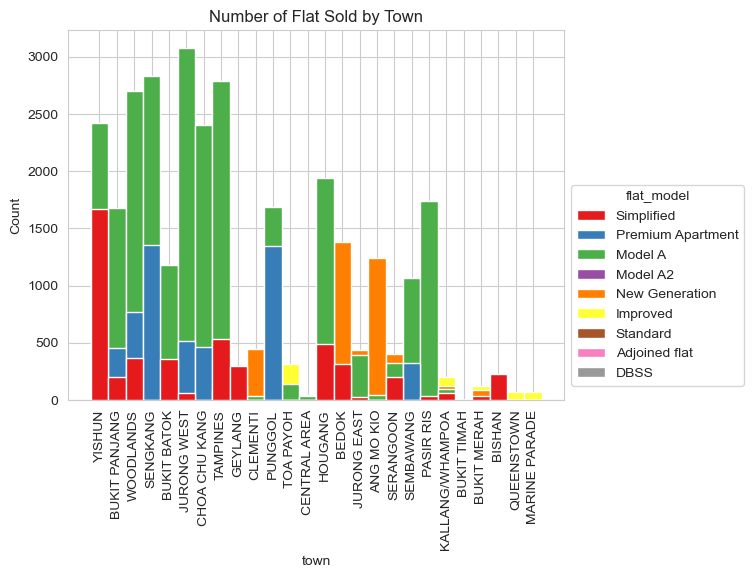

In [66]:
f1 = sns.histplot(x='town', data=four_room_select, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f1, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town')
plt.xticks(rotation=90)
plt.show()

#### Selection of Flat by Age and Town

In [67]:
hdb_age_select = 25

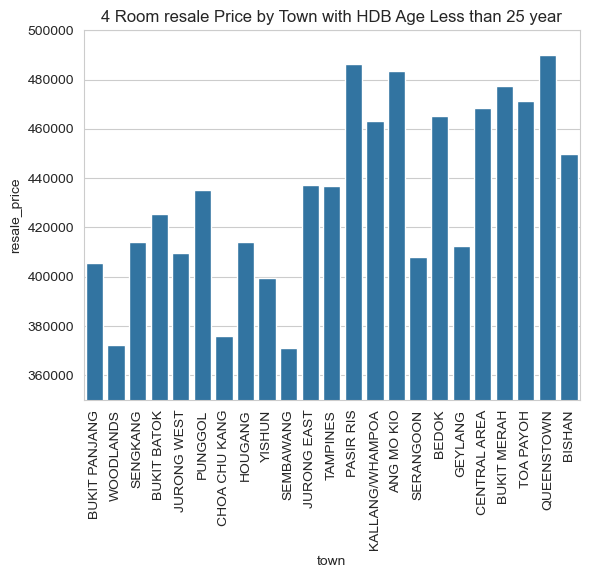

In [68]:
four_room_select_age = four_room_select[four_room_select['hdb_age'] < hdb_age_select]
sns.barplot(data=four_room_select_age, x='town', y='resale_price', errorbar=None)
plt.title('4 Room resale Price by Town with HDB Age Less than {} year'.format(hdb_age_select))
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

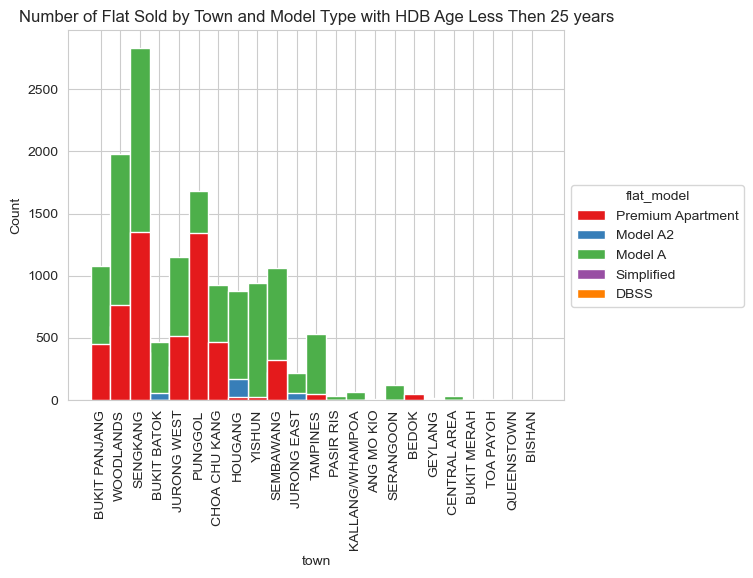

In [69]:
f2 = sns.histplot(x='town', data=four_room_select_age, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f2, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town and Model Type with HDB Age Less Then {} years'.format(hdb_age_select))
plt.xticks(rotation=90)
plt.show()

#### Selection of Flat by Distance to MRT and Town

In [70]:
mrt_distance_select = 300 #(in meters)
four_room_select_mrt = four_room_select[four_room_select['mrt_nearest_distance'] < mrt_distance_select]

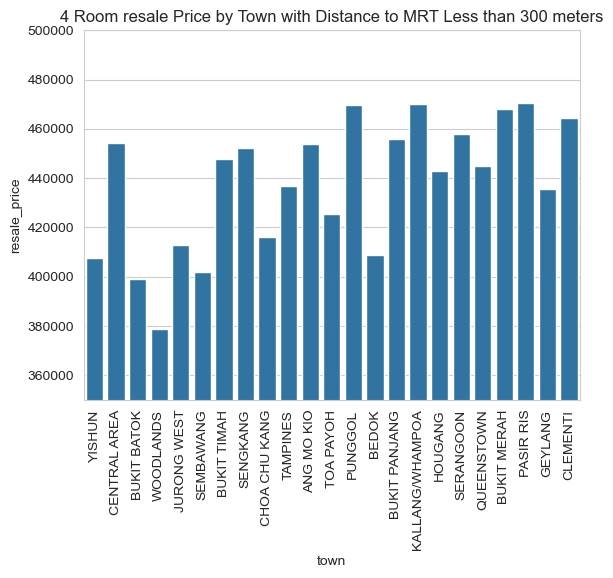

In [71]:
sns.barplot(data=four_room_select_mrt, x='town', y='resale_price', errorbar=None)
plt.title('4 Room resale Price by Town with Distance to MRT Less than {} meters'.format(mrt_distance_select))
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

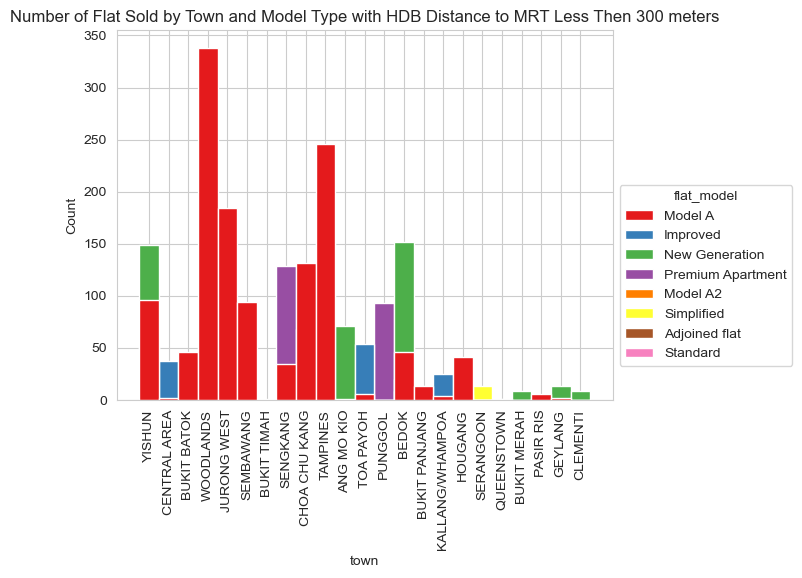

In [72]:
f3 = sns.histplot(x='town', data=four_room_select_mrt, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f3, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town and Model Type with HDB Distance to MRT Less Then {} meters'.format(mrt_distance_select))
plt.xticks(rotation=90)
plt.show()

#### Selection of Flat by Distance to Primary School and Town

In [73]:
# 'pri_sch_nearest_distance'
pri_distance_select = 300 #(in meters)
four_room_select_pri = four_room_select[four_room_select['pri_sch_nearest_distance'] < pri_distance_select]

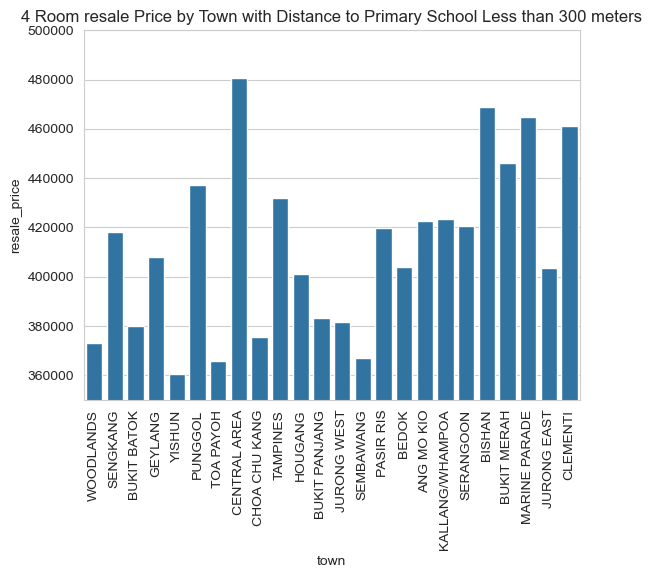

In [74]:
sns.barplot(data=four_room_select_pri, x='town', y='resale_price', errorbar=None)
plt.title('4 Room resale Price by Town with Distance to Primary School Less than {} meters'.format(pri_distance_select))
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

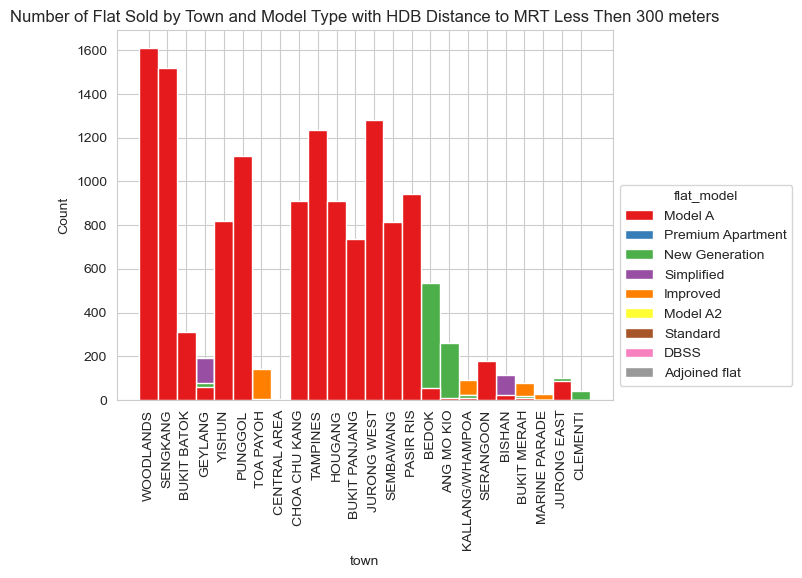

In [75]:
f5 = sns.histplot(x='town', data=four_room_select_pri, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f5, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town and Model Type with HDB Distance to MRT Less Then {} meters'.format(pri_distance_select))
plt.xticks(rotation=90)
plt.show()

#### Selection of Flat by Distance to Mall and Town

In [76]:
mall_distance_select = 300 #(in meters)
four_room_select_mall = four_room_select[four_room_select['Mall_Nearest_Distance'] < mall_distance_select]

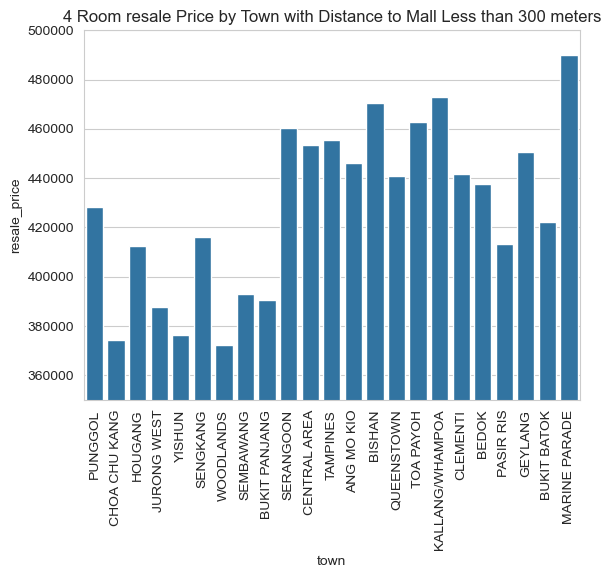

In [77]:
sns.barplot(data=four_room_select_mall, x='town', y='resale_price', errorbar=None)
plt.title('4 Room resale Price by Town with Distance to Mall Less than {} meters'.format(mall_distance_select))
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

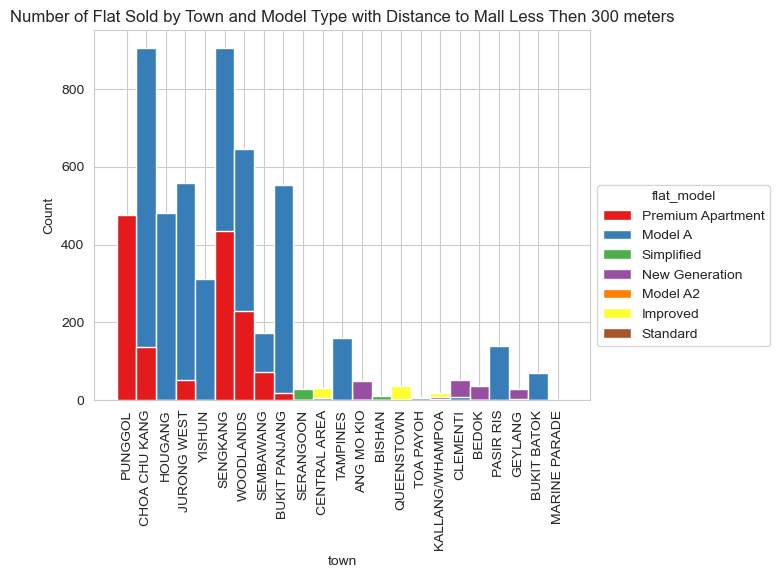

In [78]:
f6 = sns.histplot(x='town', data=four_room_select_mall, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f6, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town and Model Type with Distance to Mall Less Then {} meters'.format(mall_distance_select))
plt.xticks(rotation=90)
plt.show()

#### Selection of Flat by Various Critria

In [79]:
df.flat_type.unique()

array(['4 ROOM', '5 ROOM', 'EXECUTIVE', '3 ROOM', '2 ROOM', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [80]:
df.flat_model.unique()

array(['Model A', 'Improved', 'Apartment', 'Simplified', 'New Generation',
       'Premium Apartment', 'Model A2', 'Maisonette', 'Standard', 'DBSS',
       'Terrace', 'Model A-Maisonette', 'Type S1',
       'Premium Apartment Loft', 'Adjoined flat', 'Multi Generation',
       'Type S2', 'Premium Maisonette', 'Improved-Maisonette', '2-room'],
      dtype=object)

In [81]:
df.town.unique()

array(['KALLANG/WHAMPOA', 'BISHAN', 'BUKIT BATOK', 'YISHUN', 'GEYLANG',
       'HOUGANG', 'BEDOK', 'SENGKANG', 'TAMPINES', 'SERANGOON',
       'BUKIT MERAH', 'BUKIT PANJANG', 'WOODLANDS', 'JURONG WEST',
       'TOA PAYOH', 'CHOA CHU KANG', 'SEMBAWANG', 'ANG MO KIO',
       'PASIR RIS', 'CLEMENTI', 'PUNGGOL', 'JURONG EAST', 'CENTRAL AREA',
       'QUEENSTOWN', 'BUKIT TIMAH', 'MARINE PARADE'], dtype=object)

In [82]:
# User Input
budget_limit_high = 500000 
flat_type = '4 ROOM'
flat_model = 'Model A'
hdb_age = 20
distance_mrt = 300
distance_pri = 500
distance_mall = 300


In [83]:

df_selected = df[df.resale_price < budget_limit_high]

df_selected = df_selected[df_selected.flat_type == flat_type]

df_selected = df_selected[df_selected.flat_model == flat_model] 

df_selected = df_selected[df_selected.hdb_age < hdb_age]

df_selected = df_selected[df_selected.mrt_nearest_distance < distance_mrt]

df_selected = df_selected[df_selected.pri_sch_nearest_distance < distance_pri]

df_selected = df_selected[df_selected.Mall_Nearest_Distance < distance_mall] 

df_selected

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,,,,,,,,,,,,,,,,,,,,,
144715,2016-10,SEMBAWANG,4 ROOM,353B,ADMIRALTY DR,13 TO 15,93.0,Model A,2002,428000.0,...,52,0,1.451064,103.815971,604.842190,Sembawang Secondary School,188,0,1.445315,103.816843
108599,2014-06,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,07 TO 09,93.0,Model A,2002,428000.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471
89666,2015-03,SEMBAWANG,4 ROOM,353C,ADMIRALTY DR,01 TO 03,91.0,Model A,2002,400000.0,...,85,0,1.451934,103.822321,572.684359,Sembawang Secondary School,188,0,1.445315,103.816843
108591,2015-09,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,10 TO 12,93.0,Model A,2002,425000.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471
155676,2020-03,SEMBAWANG,4 ROOM,354A,ADMIRALTY DR,07 TO 09,93.0,Model A,2002,406000.0,...,52,0,1.451064,103.815971,575.231368,Sembawang Secondary School,188,0,1.445315,103.816843
108589,2015-08,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,10 TO 12,93.0,Model A,2002,411888.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471
108590,2015-08,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,04 TO 06,93.0,Model A,2002,415000.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471
108595,2017-12,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,13 TO 15,93.0,Model A,2002,422000.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471
108597,2013-05,SEMBAWANG,4 ROOM,353A,ADMIRALTY DR,01 TO 03,93.0,Model A,2002,449000.0,...,52,0,1.451064,103.815971,601.536773,Canberra Secondary School,188,0,1.453280,103.814471


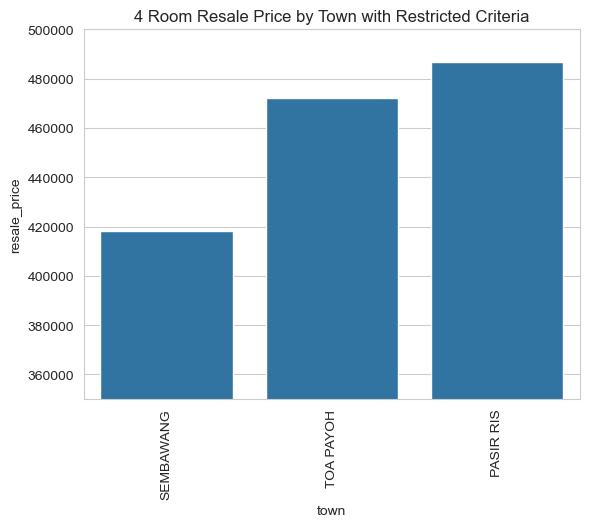

In [84]:
sns.barplot(data=df_selected, x='town', y='resale_price', errorbar=None)
plt.title('4 Room Resale Price by Town with Restricted Criteria')
plt.ylim(350000,500000)
plt.xticks(rotation = 90)
plt.show()

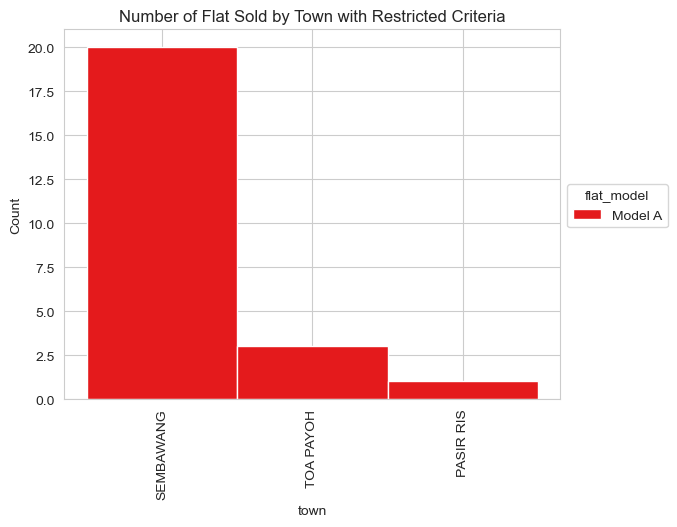

In [85]:
f7 = sns.histplot(x='town', data=df_selected, hue='flat_model', palette='Set1', alpha=1)
sns.move_legend(f7, "upper left", bbox_to_anchor=(1, 0.6))
plt.title('Number of Flat Sold by Town with Restricted Criteria')
plt.xticks(rotation=90)
plt.show()